In [1]:
import json

def resolveJson(path):
    file = open(path, "rb")
    fileJson = json.load(file)
    laneNodeList = fileJson["laneNodeList"]
    edgeList = fileJson["edgeList"]
    return (laneNodeList, edgeList)

path = r"F:/UnityProjects/MapManager/OpenDriveMaps/OutputGraph/lane.json"
laneNodeList, edgeList = resolveJson(path)

In [2]:
print(laneNodeList)

[{'roadId': '0', 'id': '1', 'startPos': {'x': -27.39508628845215, 'y': 0.0, 'z': 8.80367374420166}, 'endPos': {'x': -3.9835546016693115, 'y': 0.0, 'z': 9.729329109191895}, 'width': 3.5, 'type': 1}, {'roadId': '0', 'id': '2', 'startPos': {'x': -27.533363342285156, 'y': 0.0, 'z': 12.300941467285156}, 'endPos': {'x': -4.121830940246582, 'y': 0.0, 'z': 13.22659683227539}, 'width': 3.5, 'type': 1}, {'roadId': '0', 'id': '-1', 'startPos': {'x': -27.256811141967773, 'y': 0.0, 'z': 5.306406497955322}, 'endPos': {'x': -3.845278024673462, 'y': 0.0, 'z': 6.232061862945557}, 'width': 3.5, 'type': 1}, {'roadId': '0', 'id': '-2', 'startPos': {'x': -27.118534088134766, 'y': 0.0, 'z': 1.8091392517089844}, 'endPos': {'x': -3.7070016860961914, 'y': 0.0, 'z': 2.7347946166992188}, 'width': 3.5, 'type': 1}, {'roadId': '1', 'id': '1', 'startPos': {'x': 16.537551879882812, 'y': 0.0, 'z': 11.13176441192627}, 'endPos': {'x': 38.1729621887207, 'y': 0.0, 'z': 13.048474311828613}, 'width': 3.5, 'type': 1}, {'road

In [3]:
print(edgeList)

[]


In [4]:
import networkx as nx
G = nx.Graph()#创建一个空图

In [16]:
G.clear()

In [7]:
#设置节点列表
lanes = range(len(laneNodeList))
print(lanes)

range(0, 12)


In [8]:
#向图添加节点
G.add_nodes_from(lanes)

In [9]:
#向节点添加属性
for i,rn in enumerate(laneNodeList):
    #节点属性
    G.nodes[i]['startPosX']=rn["startPos"]["x"]
    G.nodes[i]['startPosY']=rn["startPos"]["y"]
    G.nodes[i]['startPosZ']=rn["startPos"]["z"]
    G.nodes[i]['endPosX']=rn["endPos"]["x"]
    G.nodes[i]['endPosY']=rn["endPos"]["y"]
    G.nodes[i]['endPosZ']=rn["endPos"]["z"]
    G.nodes[i]['roadId']=rn["roadId"]
    G.nodes[i]['id']=rn["id"]
    G.nodes[i]['width']=rn["width"]
    G.nodes[i]['type']=rn["type"]

# j = len(roadNodeList)
# for x,jn in enumerate(junctionNodeList):
#     G.nodes[j]['junctionType']=jn["junctionType"]
#     j+=1
print(G.nodes[0])

{'startPosX': -27.39508628845215, 'startPosY': 0.0, 'startPosZ': 8.80367374420166, 'endPosX': -3.9835546016693115, 'endPosY': 0.0, 'endPosZ': 9.729329109191895, 'roadId': '0', 'id': '1', 'width': 3.5, 'type': 1}


In [8]:
for i,e in enumerate(edgeList):
    rnI = e["rnIndex"]
    jnI = e["jnIndex"]
    G.add_edge(rnI,jnI)
G.edges.data()

EdgeDataView([(0, 10, {}), (1, 10, {}), (1, 12, {}), (2, 10, {}), (2, 11, {}), (3, 11, {}), (4, 11, {}), (5, 11, {}), (6, 10, {}), (7, 12, {}), (8, 12, {}), (9, 12, {})])

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

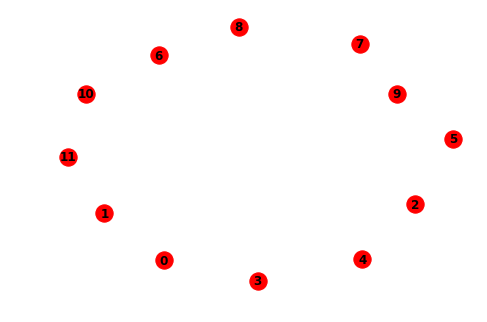

In [11]:
nx.draw(G,with_labels=True,font_weight='bold')

In [14]:
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(roads) )
pos.update( (n, (2, i+0.5)) for i, n in enumerate(junctions) )

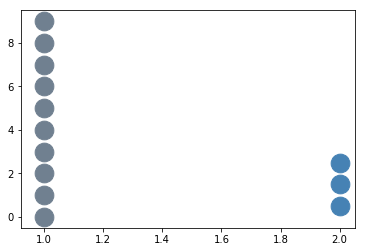

In [19]:
nx.draw_networkx_nodes(G,pos,nodelist=roads, node_color='slategray',node_size = 350, with_labels=False)
nx.draw_networkx_nodes(G,pos,nodelist=junctions, node_color='steelblue',node_size = 350, with_labels=False)

In [22]:
nx.write_gpickle(G,'inter3.gpickle')

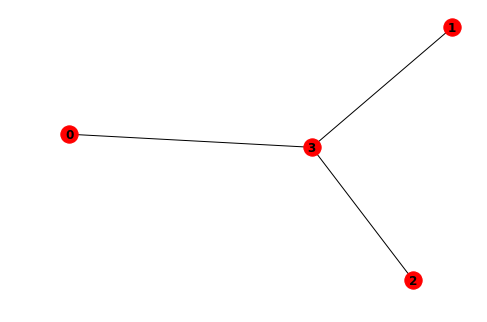

In [13]:
G2 = nx.read_gpickle('t_intersection.gpickle')
nx.draw(G2,with_labels=True,font_weight='bold')